In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import normalize
from sklearn.decomposition import PCA
from sklearn.cluster import MiniBatchKMeans

In [2]:
df = pd.read_csv('/Users/justinsmith/Documents/GitHub/bostonmara2013.csv')

In [3]:
df.tail()

,25k,age,name,division,10k,gender,half,official,bib,ctz,...,overall,pace,state,30k,5k,genderdiv,20k,35k,city,40k
16159,144.85,65,"Loy, Judy",6,57.57,F,121.98,247.47,20854,NaN,...,17014,9.45,WA,174.75,28.50,6686,115.63,204.83,Vancouver,234.48
16160,133.32,64,"Homeyer, Thomas F.",258,52.80,M,112.27,229.72,20856,NaN,...,13796,8.77,NY,161.00,26.57,9024,106.38,189.82,Tully,217.88
16161,139.83,75,"Pain, Malcolm A",3,54.97,M,117.58,239.97,20870,NaN,...,16083,9.17,NS,168.82,27.48,9994,111.45,198.42,Halifax,227.53
16162,135.38,80,"Wilson, Harold W",1,53.13,M,113.80,233.90,20907,NaN,...,14768,8.93,TX,164.02,26.93,9434,107.85,192.80,Tyler,221.42
16163,144.95,61,"Collins, Laurel M",49,57.57,F,121.55,249.15,20908,NaN,...,17144,9.52,CA,175.82,28.93,6762,115.32,206.67,Berkeley,235.85


In [4]:
df.drop(columns=['ctz','state', 'name', 'country', 'bib', 'city'],inplace=True)

In [5]:
df.dropna(inplace=True)

In [13]:
df.replace(to_replace='-', value='', inplace=True)

In [14]:
splits = ['10k', '25k', '35k', '30k', '5k', 'half', '20k', '40k' ]
for split in splits:
    df[split] = pd.to_numeric(df[split])

df['gender'] = np.where(df['gender']=='F', 1, 0)

In [18]:
df.dropna(inplace=True)

In [19]:
y = df['official'].values

In [20]:
X = df.drop(columns='official')

In [21]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16054 entries, 0 to 16163
Data columns (total 14 columns):
25k          16054 non-null float64
age          16054 non-null int64
division     16054 non-null int64
10k          16054 non-null float64
gender       16054 non-null int64
half         16054 non-null float64
overall      16054 non-null int64
pace         16054 non-null float64
30k          16054 non-null float64
5k           16054 non-null float64
genderdiv    16054 non-null int64
20k          16054 non-null float64
35k          16054 non-null float64
40k          16054 non-null float64
dtypes: float64(9), int64(5)
memory usage: 1.8 MB


In [22]:
X_norm = normalize(X)

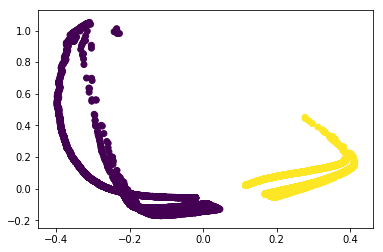

Comparing k-means clusters against the data:
col_0  85.53   87.20   87.22   88.32   88.43   90.02   90.88   90.90   91.78   \
row_0                                                                           
0           1       1       1       1       1       1       1       2       2   
1           0       0       0       0       0       0       0       0       0   

col_0  93.12    ...    278.00  278.15  279.57  279.77  280.58  280.72  281.45  \
row_0           ...                                                             
0           1   ...         1       0       1       1       1       1       1   
1           0   ...         0       1       0       0       0       0       0   

col_0  281.60  282.20  284.23  
row_0                          
0           1       1       0  
1           0       0       1  

[2 rows x 5363 columns]


In [23]:
# Reduce it to two components.
X_pca = PCA(2).fit_transform(X_norm)

# Calculate predicted values.
y_pred = KMeans(n_clusters=2, random_state=42).fit_predict(X_pca)

# Plot the solution.
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_pred)
plt.show()

# Check the solution against the data.
print('Comparing k-means clusters against the data:')
print(pd.crosstab(y_pred, y))

In [24]:
minibatchkmeans = MiniBatchKMeans(
    init='random',
    n_clusters=2,
    batch_size=200)
minibatchkmeans.fit(X_pca)

# Add the new predicted cluster memberships to the data frame.
predict_mini = minibatchkmeans.predict(X_pca)

# Check the MiniBatch model against our earlier one.
print('Comparing k-means and mini batch k-means solutions:')
print(pd.crosstab(predict_mini, y_pred))

Comparing k-means and mini batch k-means solutions:
col_0     0     1
row_0            
0      9617     0
1         0  6437


In [25]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.9,
    random_state=42)

In [26]:
from sklearn.cluster import MeanShift, estimate_bandwidth

# Here we set the bandwidth. This function automatically derives a bandwidth
# number based on an inspection of the distances among points in the data.
bandwidth = estimate_bandwidth(X_train, quantile=0.2, n_samples=500)

# Declare and fit the model.
ms = MeanShift(bandwidth=bandwidth, bin_seeding=True)
ms.fit(X_train)

# Extract cluster assignments for each data point.
labels = ms.labels_

# Coordinates of the cluster centers.
cluster_centers = ms.cluster_centers_

# Count our clusters.
n_clusters_ = len(np.unique(labels))

print("Number of estimated clusters: {}".format(n_clusters_))


Number of estimated clusters: 3


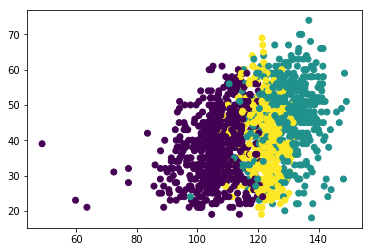

Comparing the assigned categories to the ones in the data:
col_0   0  1  2
row_0          
87.22   1  0  0
105.40  1  0  0
113.47  1  0  0
130.47  1  0  0
141.67  1  0  0
143.10  1  0  0
148.03  1  0  0
149.00  1  0  0
149.33  1  0  0
149.88  1  0  0
150.45  1  0  0
150.52  1  0  0
152.05  1  0  0
152.10  1  0  0
154.38  1  0  0
155.40  1  0  0
156.10  1  0  0
156.32  1  0  0
156.82  2  0  0
157.00  1  0  0
157.13  1  0  0
157.28  1  0  0
157.98  1  0  0
158.45  1  0  0
158.92  1  0  0
159.00  1  0  0
159.15  1  0  0
159.63  1  0  0
159.67  1  0  0
160.03  1  0  0
...    .. .. ..
251.73  0  1  0
252.90  0  1  0
253.25  0  1  0
253.43  0  1  0
254.40  0  1  0
254.53  0  1  0
255.28  0  1  0
255.43  0  1  0
255.57  0  1  0
256.02  0  1  0
256.28  0  1  0
256.37  0  1  0
257.08  0  1  0
257.35  0  1  0
257.97  0  1  0
258.13  0  1  0
259.25  0  1  0
259.60  0  1  0
261.00  0  1  0
261.07  0  1  0
261.50  0  1  0
261.83  0  1  0
262.18  0  1  0
263.05  0  1  0
266.53  0  1  0
267.80  0  1 

In [27]:
plt.scatter(X_train.iloc[:, 0], X_train.iloc[:, 1], c=labels)
plt.show()

print('Comparing the assigned categories to the ones in the data:')
print(pd.crosstab(y_train,labels))

/Users/justinsmith/anaconda3/lib/python3.6/site-packages/sklearn/manifold/spectral_embedding_.py:234: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"
/Users/justinsmith/anaconda3/lib/python3.6/site-packages/sklearn/manifold/spectral_embedding_.py:234: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"


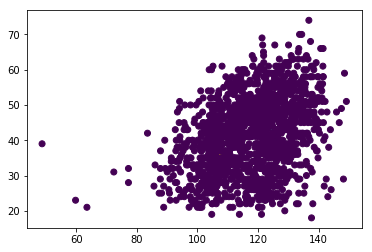

Comparing the assigned categories to the ones in the data:
col_0   0  1  2
row_0          
87.22   1  0  0
105.40  1  0  0
113.47  1  0  0
130.47  1  0  0
141.67  1  0  0
143.10  1  0  0
148.03  1  0  0
149.00  1  0  0
149.33  1  0  0
149.88  1  0  0
150.45  1  0  0
150.52  1  0  0
152.05  1  0  0
152.10  1  0  0
154.38  1  0  0
155.40  1  0  0
156.10  1  0  0
156.32  1  0  0
156.82  2  0  0
157.00  1  0  0
157.13  1  0  0
157.28  1  0  0
157.98  1  0  0
158.45  1  0  0
158.92  1  0  0
159.00  1  0  0
159.15  1  0  0
159.63  1  0  0
159.67  1  0  0
160.03  1  0  0
...    .. .. ..
251.73  1  0  0
252.90  1  0  0
253.25  1  0  0
253.43  1  0  0
254.40  1  0  0
254.53  1  0  0
255.28  1  0  0
255.43  1  0  0
255.57  1  0  0
256.02  1  0  0
256.28  1  0  0
256.37  1  0  0
257.08  1  0  0
257.35  1  0  0
257.97  1  0  0
258.13  1  0  0
259.25  1  0  0
259.60  1  0  0
261.00  1  0  0
261.07  1  0  0
261.50  1  0  0
261.83  1  0  0
262.18  1  0  0
263.05  1  0  0
266.53  1  0  0
267.80  1  0 

In [28]:
from sklearn.cluster import SpectralClustering

# We know we're looking for three clusters.
n_clusters=3

# Declare and fit the model.
sc = SpectralClustering(n_clusters=n_clusters)
sc.fit(X_train)

#Predicted clusters.
predict=sc.fit_predict(X_train)

#Graph results.
plt.scatter(X_train.iloc[:, 0], X_train.iloc[:, 1], c=predict)
plt.show()

print('Comparing the assigned categories to the ones in the data:')
print(pd.crosstab(y_train,predict))

In [29]:
from sklearn.cluster import AffinityPropagation
from sklearn import metrics

# Declare the model and fit it in one statement.
# Note that you can provide arguments to the model, but we didn't.
af = AffinityPropagation().fit(X_train)
print('Done')

# Pull the number of clusters and cluster assignments for each data point.
cluster_centers_indices = af.cluster_centers_indices_
n_clusters_ = len(cluster_centers_indices)
labels = af.labels_

print('Estimated number of clusters: {}'.format(n_clusters_))


Done
Estimated number of clusters: 531


In [30]:
for k in np.arange(2, 7, 1):
    model = KMeans(n_clusters=k, random_state=42).fit(X_norm)
    labels = model.labels_
    silhouette = metrics.silhouette_score(X_norm, labels, metric='euclidean')
    print('K: {}, silhouette: {}'.format(k, silhouette))

K: 2, silhouette: 0.520910050552185
K: 3, silhouette: 0.6048930948304407
K: 4, silhouette: 0.6367587071975538
K: 5, silhouette: 0.544005644921699
K: 6, silhouette: 0.5463781166712519


In [34]:
full_pred = KMeans(n_clusters=3, random_state=42).fit_predict(X_norm)

pd.crosstab(y, full_pred) 

col_0,0,1,2
row_0,,,
85.53,0,0,1
87.20,0,0,1
87.22,0,0,1
88.32,0,0,1
88.43,0,0,1
90.02,0,0,1
90.88,0,0,1
90.90,0,0,2
91.78,0,0,2


In [35]:
from sklearn import metrics
    
metrics.adjusted_rand_score(y, full_pred)

0.00012136142015009622

Clusters appear to be close to random. Having two clusters appears to give the most well defined groups though not very useful from a narrative perspective. 